# Lecture 8 - Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import math

import warnings
warnings.filterwarnings("ignore")

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = w_{1}x + w_{0}
$$
where $w_{1}$ is commonly known as the *slope*, and $w_{0}$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

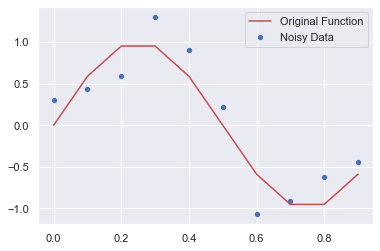

In [78]:
x = np.arange(0,1,0.1) # input values
noise = np.random.random(x.shape[0])-0.5 # noise
y = np.sin(2*math.pi*x) # original function
y_noisy = y+noise # noisy original function
# print(x,noise,y,y_noisy)
sns.lineplot(x,y,color='r') # plotting the original function
sns.scatterplot(x,y_noisy) # noisy data points 
plt.legend(labels=['Original Function', 'Noisy Data'])

In [79]:
print(x.shape,y_noisy.shape)
x = np.reshape(x,(x.shape[0],1))
y_noisy = np.reshape(y_noisy,(y_noisy.shape[0],1))
print(x.shape,y_noisy.shape)


(10,) (10,)
(10, 1) (10, 1)


(10, 1) (10, 1)


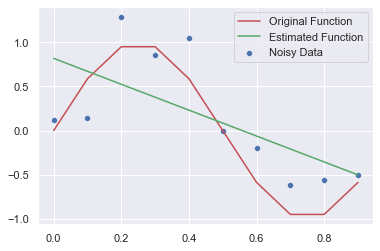

In [17]:
from sklearn.linear_model import LinearRegression
## Training phase
model = LinearRegression(fit_intercept=True)
model.fit(x,y_noisy)

## Generating test data for visualization of the estimated SLR
x2 = np.arange(0,1,0.1)
x2 = np.reshape(x2,(x2.shape[0],1))

yfit_simpleLR = model.predict(x2)
print(x2.shape,yfit_simpleLR.shape)

# print(x2.shape,yfit.shape)
sns.lineplot(x[:,0],y,color='r')
sns.lineplot(x2[:,0],yfit_simpleLR[:,0],color='g')
sns.scatterplot(x[:,0],y_noisy[:,0])

plt.legend(labels=['Original Function', 'Estimated Function', 'Noisy Data'])


In [18]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     [-1.46882444]
Model intercept: [0.81898629]


Handling multidimensional linear models of the form
$$
y = w_0 + w_1 x_1 + w_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [28]:
# Preparing data
rng = np.random.RandomState(1)
X_multi = 10 * rng.rand(10, 3) # 10 data points and 3 features
y_multi = 0.5 + np.dot(X_multi, [1.5, -2., 1.])
print(X_multi.shape,y_multi.shape)
print('Fitting model')
model = LinearRegression(fit_intercept=True)
model.fit(X_multi, y_multi)
print('Printing model parameters')
print(model.intercept_)
print(model.coef_)

(10, 3) (10,)
Fitting model
Printing model parameters
0.49999999999999645
[ 1.5 -2.   1. ]


### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

(10, 1) (10, 1)


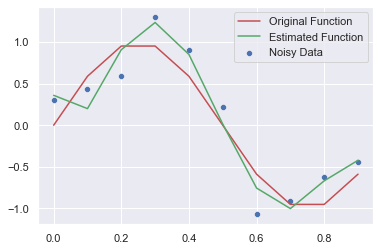

In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


## builiding model
poly_model = make_pipeline(PolynomialFeatures(degree=5,include_bias=True),
                           LinearRegression())
print(x.shape, y_noisy.shape)
## training
poly_model.fit(x, y_noisy)

## evaluation
x2 = np.arange(0,1,0.1)
x2 = np.reshape(x2,(x2.shape[0],1))
yfit = poly_model.predict(x2)

# ## noisy test data 
# x3 = np.arange(0,1,0.1) + 0.2
# x3 = np.reshape(x3,(x3.shape[0],1))
# yfit_noisy = poly_model.predict(x3)

sns.lineplot(x[:,0],y,color='r')
sns.lineplot(x2[:,0],yfit[:,0],color='g')
# sns.lineplot(x3[:,0],yfit_noisy[:,0],color='k')

sns.scatterplot(x[:,0],y_noisy[:,0])
plt.legend(labels=['Original Function', 'Estimated Function','Noisy Data'])

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [21]:
from sklearn import metrics
y_test = y


print('Error values using Simple Linear Regression;')
predictions = yfit_simpleLR
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print(20*'*')

print('Error values using Polynomial Linear Regression;')
predictions = yfit
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Error values using Simple Linear Regression;
MAE: 0.42899157460153603
MSE: 0.2509003849513723
RMSE: 0.5008995757149054
********************
Error values using Polynomial Linear Regression;
MAE: 0.17010281030059154
MSE: 0.05040258299342857
RMSE: 0.22450519591632745


## Case Study - Housing Price


### Import data

* The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
data = pd.read_csv('Housing.csv')
data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.columns

# Analysis

Let's create some simple plots to check out the data!

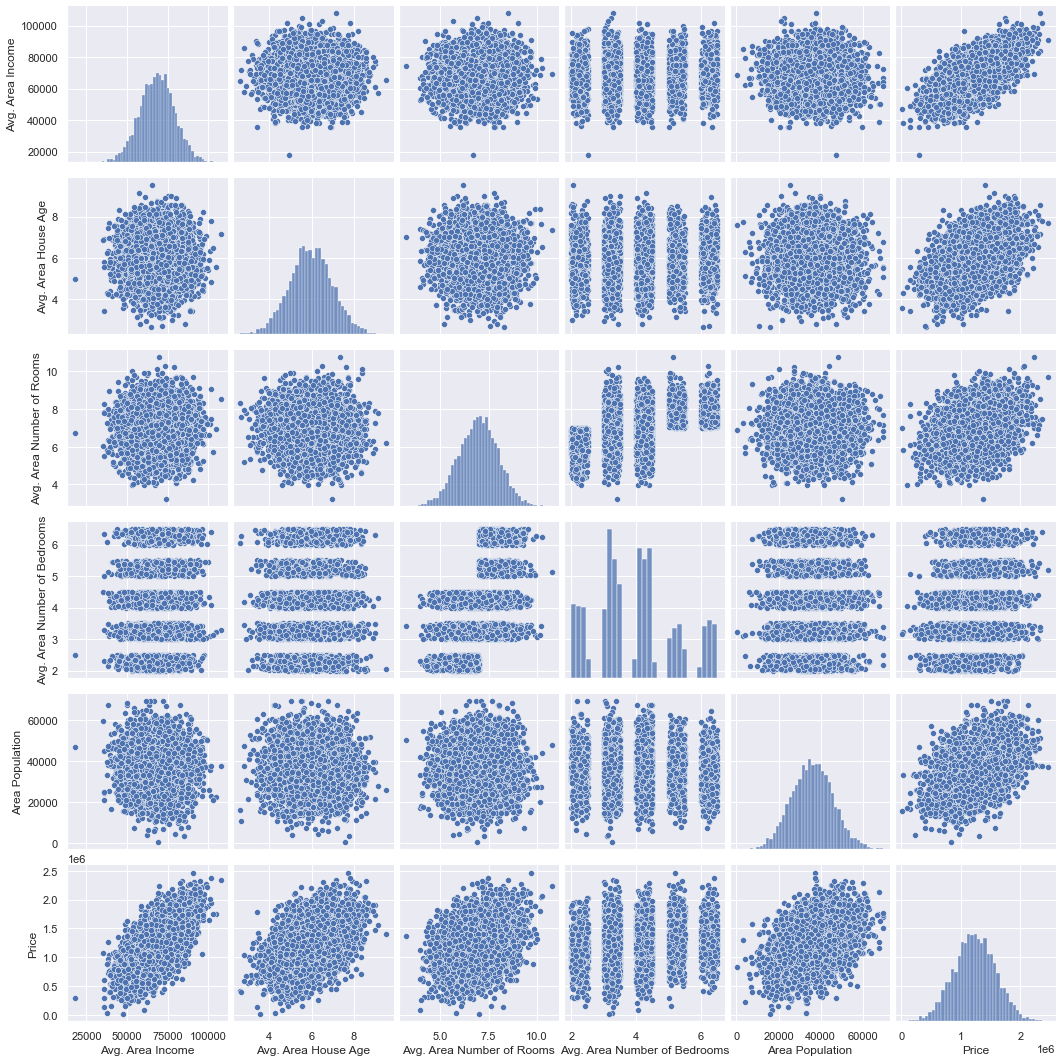

In [47]:
sns.pairplot(data)

<AxesSubplot:xlabel='Price', ylabel='Density'>

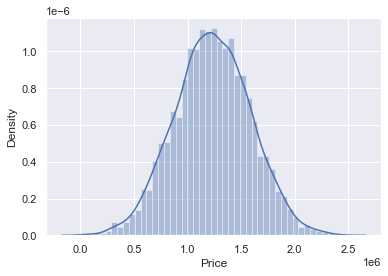

In [48]:
sns.distplot(data['Price'])

<AxesSubplot:>

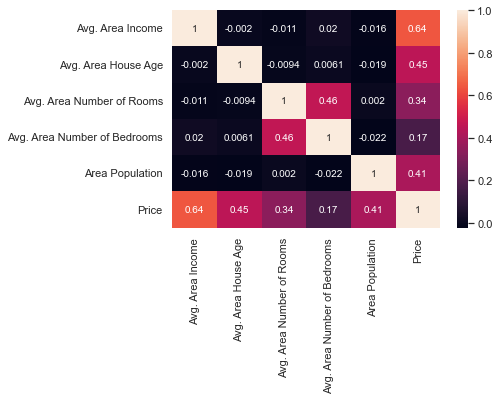

In [49]:
sns.heatmap(data.corr(),annot=True)

In order to prepare the data for fitting to the regression model, the data must be of:

Training data:  X{array-like, sparse matrix} of shape (n_samples, n_features)

Target values: yarray-like of shape (n_samples,) or (n_samples, n_targets)


Look here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [50]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [51]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape,X_test.shape,X.shape)

(4000, 5) (1000, 5) (5000, 5)


## Creating and Training the Model

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [58]:
predictions = lm.predict(X_test)

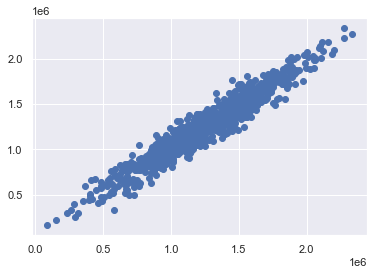

In [59]:
plt.scatter(y_test,predictions)

**Residual Histogram**

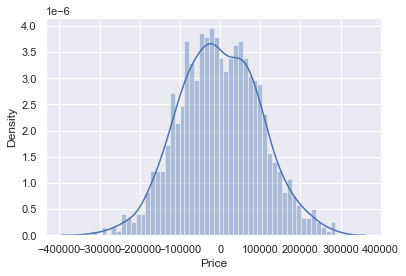

In [60]:
sns.distplot((y_test-predictions),bins=50);

In [61]:
from sklearn import metrics

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81305.2329816113
MSE: 10100187856.997404
RMSE: 100499.6908303573


## Finding the best M for Polynomial Regression

In [81]:
X = data['Avg. Area Income']
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape,X_test.shape,X.shape)

(4000,) (1000,) (5000,)


RMSE Test: 272573.8500360756
RMSE Training: 270932.3105133541


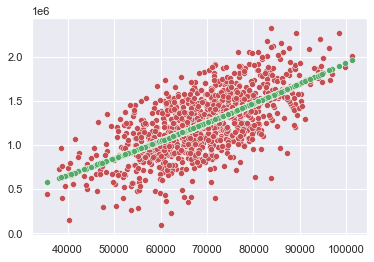

In [113]:

## builiding model
poly_model = make_pipeline(PolynomialFeatures(degree=2,include_bias=True),
                           LinearRegression())
## training
# print(type(X_train))
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_train = np.reshape(X_train,(4000,1))

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_test = np.reshape(X_test,(1000,1))

poly_model.fit(X_train, y_train)



# evaluation
yfit = poly_model.predict(X_test)
yfit_training = poly_model.predict(X_train)

sns.scatterplot(X_test[:,0],y_test,color='r') # ground_truth
sns.scatterplot(X_test[:,0],yfit,color='g') # prediction

print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test, yfit)))
print('RMSE Training:', np.sqrt(metrics.mean_squared_error(y_train, yfit_training)))


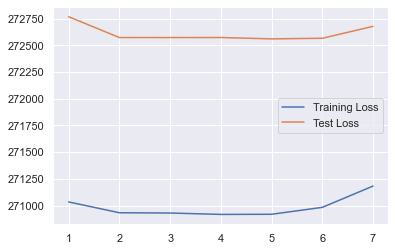

In [114]:

# Finding the best M
collect_training_loss = []
collect_test_loss = []
collect_m = []
for m in [1,2,3,4,5,6,7]:
    poly_model = make_pipeline(PolynomialFeatures(degree=m,include_bias=True),LinearRegression())
    poly_model.fit(X_train, y_train)
    # evaluation
    yfit = poly_model.predict(X_test)
    yfit_training = poly_model.predict(X_train)
    
    collect_test_loss.append(np.sqrt(metrics.mean_squared_error(y_test, yfit)))
    collect_training_loss.append(np.sqrt(metrics.mean_squared_error(y_train, yfit_training)))
    collect_m.append(m)

sns.lineplot(collect_m,collect_training_loss)
sns.lineplot(collect_m,collect_test_loss)
plt.legend(labels=['Training Loss', 'Test Loss'])

272768.74432917207


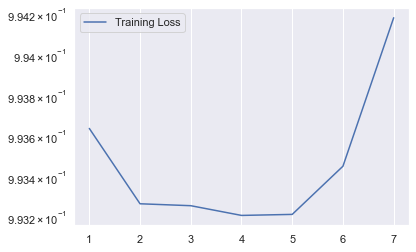

In [115]:
maxi = np.max([np.max(collect_training_loss),np.max(collect_test_loss)])
print(maxi)
g_results = sns.lineplot(collect_m,collect_training_loss/maxi)
g_results.set(yscale='log')

plt.legend(labels=['Training Loss'])


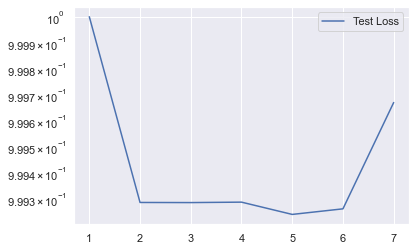

In [116]:

g_results = sns.lineplot(collect_m,collect_test_loss/maxi)
g_results.set(yscale='log')
plt.legend(labels=['Test Loss'])